In [72]:
import numpy as np
import os
import csv

basepath = '../data/w3c'
outpath = '../data/w3c_subsampled/'

path = os.path.join(basepath, 'SBJ99_bold.npy')
bold = np.load(path)

task_path = os.path.join(basepath, 'task_info_99.csv')
tasks = []
with open(task_path) as f:
    for row in csv.DictReader(f):
        tasks.append(row)


## Subsample data (old version)

In [ ]:
subjects = {}

In [5]:
orig_task = 'task_info_99.csv'
subjects['SBJ99'] = orig_task

save_file = os.path.join(outpath, 'SBJ99_bold.npy')
np.save(save_file, bold)

task_header = ['task_name']
with open(os.path.join(outpath, orig_task), 'w') as out:
    writer = csv.writer(out)
    writer.writerow(task_header)
    for t in tasks:
        writer.writerow([t[h] for h in task_header])

In [5]:
# Create new subjects by dividing the parcels into buckets
# for scale 2, create 2 new subjects:
#            SBJ_2_0 (abbreviated SBJ20) that contains the first half of the parcels; and 
#            SBJ_2_1 (abbreviated SBJ21) that contains the second half of the parcels.
# for scale 4, create 4 new subjects SBJ40, SBJ41, SBJ42, SBJ43 with the associated quarter parcels
# Similar for 8, ...
#
# They will all use the same task file since we didnt modify the length of the scan
import random
import math

n_parcels = bold.shape[1]
parcels_ids = list(range(n_parcels))
random.shuffle(parcels_ids)
print(parcels_ids)
parcels_ids = np.array(parcels_ids)

for scale in [2,4,8]:
    parcs_bucket_size = math.floor(n_parcels / scale)
    for parc_id in range(scale):
        ids = list(range(parc_id * parcs_bucket_size, (parc_id+1) * parcs_bucket_size))
        bucket_parcels = parcels_ids[ids]
#         print(bucket_parcels)
        new_bold = bold[:, bucket_parcels]
        sbjname = 'SBJ{}{}'.format(scale, parc_id)
        save_file = os.path.join(outpath, '{}_bold.npy'.format(sbjname))
        np.save(save_file, new_bold)
        subjects[sbjname] = orig_task
        
print(list(subjects.keys()))

[20, 31, 34, 13, 58, 17, 25, 30, 12, 10, 60, 43, 57, 2, 49, 32, 39, 23, 62, 61, 7, 41, 54, 15, 46, 37, 9, 22, 55, 3, 51, 64, 47, 24, 53, 16, 28, 11, 27, 42, 36, 18, 65, 63, 59, 19, 56, 50, 6, 52, 1, 8, 40, 29, 33, 44, 38, 35, 4, 45, 14, 26, 0, 5, 48, 21]
['SBJ99', 'SBJ20', 'SBJ21', 'SBJ40', 'SBJ41', 'SBJ42', 'SBJ43', 'SBJ80', 'SBJ81', 'SBJ82', 'SBJ83', 'SBJ84', 'SBJ85', 'SBJ86', 'SBJ87']


In [11]:
# Create new subjects by using only a fraction of the generated sequence
import math

n_trs = bold.shape[0]

sbjs_totrim = ['SBJ99', 'SBJ20', 'SBJ40', 'SBJ80']

for scale in [0.5, 0.75, 0.83]:
    trs = math.floor(n_trs * scale)
    scale_str = str(scale * 100)
    task_path = 'task_info_{}.csv'.format(scale_str)
    with open(os.path.join(outpath, task_path), 'w') as out:
        writer = csv.writer(out)
        writer.writerow(task_header)
        for t in tasks[:trs]:
            writer.writerow([t[h] for h in task_header])
    
    for sbj_trim in sbjs_totrim:
        loaded_bold = np.load(os.path.join(outpath, '{}_bold.npy'.format(sbj_trim)))
        new_bold = loaded_bold[0:trs, :]
        sbjname = '{}-{}'.format(sbj_trim, scale_str)
        save_file = os.path.join(outpath, '{}_bold.npy'.format(sbjname))
        np.save(save_file, new_bold)

        subjects[sbjname] = task_path

print(list(subjects.keys()))

['SBJ99', 'SBJ20', 'SBJ21', 'SBJ40', 'SBJ41', 'SBJ42', 'SBJ43', 'SBJ80', 'SBJ81', 'SBJ82', 'SBJ83', 'SBJ84', 'SBJ85', 'SBJ86', 'SBJ87', 'SBJ99-50.0', 'SBJ20-50.0', 'SBJ40-50.0', 'SBJ80-50.0', 'SBJ99-75.0', 'SBJ20-75.0', 'SBJ40-75.0', 'SBJ80-75.0', 'SBJ99-83.0', 'SBJ20-83.0', 'SBJ40-83.0', 'SBJ80-83.0']


In [12]:
cohort_path = os.path.join(outpath, 'cohort.csv')

cohort_header = ['id0', 'id1', 'id2', 'path', 'TR', 'task_path_G']

with open(cohort_path, 'w') as out:
    writer = csv.writer(out)
    writer.writerow(cohort_header)
    for sbjname, taskpath in subjects.items():
        writer.writerow([sbjname, '', '', '{}_bold.npy'.format(sbjname), '0.72', taskpath])


In [13]:
import json

print(json.dumps(list(subjects.keys())))

["SBJ99", "SBJ20", "SBJ21", "SBJ40", "SBJ41", "SBJ42", "SBJ43", "SBJ80", "SBJ81", "SBJ82", "SBJ83", "SBJ84", "SBJ85", "SBJ86", "SBJ87", "SBJ99-50.0", "SBJ20-50.0", "SBJ40-50.0", "SBJ80-50.0", "SBJ99-75.0", "SBJ20-75.0", "SBJ40-75.0", "SBJ80-75.0", "SBJ99-83.0", "SBJ20-83.0", "SBJ40-83.0", "SBJ80-83.0"]


## Subsample data 2.0

In [26]:
import numpy as np
import os
import csv

basepath = '../data/w3c'
outpath = '../data/w3c_ss2/'
os.makedirs(outpath, exist_ok=True)

path = os.path.join(basepath, 'SBJ99_bold.npy')
bold = np.load(path)

task_path = os.path.join(basepath, 'task_info_99.csv')
tasks = []
with open(task_path) as f:
    for row in csv.DictReader(f):
        tasks.append(row['task_name'])

tasks = np.array(tasks)

In [36]:

def add_prefix_zeros(s, cnt):
    assert len(s) <= cnt
    if len(s) == cnt:
        return s
    return '0' * (cnt - len(s)) + s

def format_perc(perc):
    if perc == 1.0:
        return '99'
    return add_prefix_zeros(str(round(perc * 100)), 2)

In [37]:
import math
import pandas as pd

window_sizes = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5]
ds = bold.shape[0]

for ws in window_sizes:
    offsets = [0] if ws == 1.0 else [0.0, (1.0 - ws) / 2, 1.0 - ws]
    for off in offsets:
        idx_st = math.floor(ds * off)
        idx_en = math.floor(ds * (off + ws))
        bold_ss = bold[idx_st:idx_en]
        tasks_ss = tasks[idx_st:idx_en]
        sbjname = 'SBJ-{}-{}'.format(format_perc(ws), format_perc(off))
        save_file = os.path.join(outpath, '{}_bold.npy'.format(sbjname))
        np.save(save_file, bold_ss)
        task_file = os.path.join(outpath, 'task_info_{}.csv'.format(sbjname))
        pd.DataFrame(tasks_ss, columns=['task_name']).to_csv(task_file, index=False)

# Skip X TRs (fewer samples)

In [6]:
import numpy as np
import os
import csv

basepath = '../data/w3c'
outpath = '../data/w3c_hightr2/'
os.makedirs(outpath, exist_ok=True)

path = os.path.join(basepath, 'SBJ99_bold.npy')
bold = np.load(path)

task_path = os.path.join(basepath, 'task_info_99.csv')
tasks = []
with open(task_path) as f:
    for row in csv.DictReader(f):
        tasks.append(row)


In [7]:
bold.shape

(1667, 66)

In [9]:
orig_task = 'task_info_99.csv'
subjects = {}
subjects['SBJ99'] = orig_task

save_file = os.path.join(outpath, 'SBJ99_bold.npy')
np.save(save_file, bold)

task_header = ['task_name']
with open(os.path.join(outpath, orig_task), 'w') as out:
    writer = csv.writer(out)
    writer.writerow(task_header)
    for t in tasks:
        writer.writerow([t[h] for h in task_header])

In [10]:
# Create new subjects by counting every X TRs (skip 1, skip 2, skip 3, ...)
#
# They will also all use the same task file since we didnt modify the length of the scan
import random
import math

n_trs = bold.shape[0]
task_header = ['task_name']

TR = 0.72
trs = {}
subjects = {}

for count_every in [2,3,4]:
    for start_id in range(2):
        trs_ids = list(range(start_id, n_trs, count_every))
        sbjname = 'SBJe{}v{}'.format(count_every, start_id)
        new_bold = bold[trs_ids, :]
        save_file = os.path.join(outpath, '{}_bold.npy'.format(sbjname))

        np.save(save_file, new_bold)
        

        task_path = 'task_info_e{}v{}.csv'.format(count_every, start_id)
        with open(os.path.join(outpath, task_path), 'w') as out:
            writer = csv.writer(out)
            writer.writerow(task_header)
            for tr_id in trs_ids:
                writer.writerow([tasks[tr_id][h] for h in task_header])
        
        subjects[sbjname] = task_path
        trs[sbjname] = TR * count_every
        
print(list(subjects.keys()))
print(list(trs.keys()))

['SBJe2v0', 'SBJe2v1', 'SBJe3v0', 'SBJe3v1', 'SBJe4v0', 'SBJe4v1']
['SBJe2v0', 'SBJe2v1', 'SBJe3v0', 'SBJe3v1', 'SBJe4v0', 'SBJe4v1']


In [19]:
cohort_path = os.path.join(outpath, 'cohort.csv')

cohort_header = ['id0', 'id1', 'id2', 'path', 'TR', 'task_path_G']
task_basepath = '/scratch/groups/saggar/demapper-w3c/data_hightr'

with open(cohort_path, 'w') as out:
    writer = csv.writer(out)
    writer.writerow(cohort_header)
    for sbjname, taskpath in subjects.items():
        writer.writerow([sbjname, '', '', '{}_bold.npy'.format(sbjname), trs[sbjname], os.path.join(task_basepath, taskpath)])


In [13]:
# for sbj in subjects.keys():
sbj = 'SBJe2v0'
new_bold = np.load(os.path.join(outpath, '{}_bold.npy'.format(sbj)))

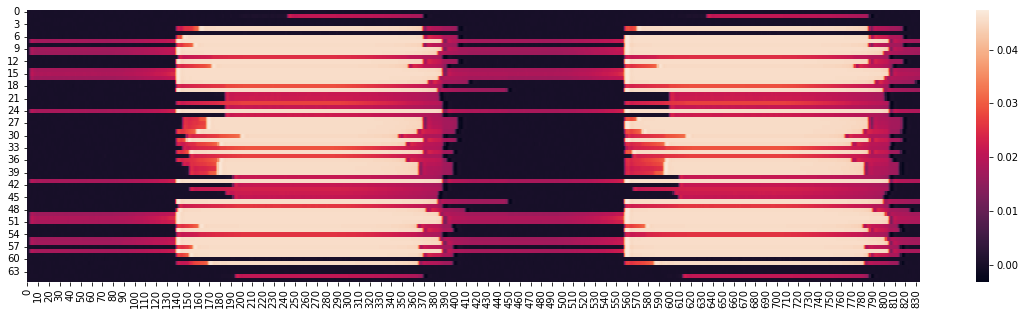

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 5))
sns.heatmap(new_bold.T)
plt.show()

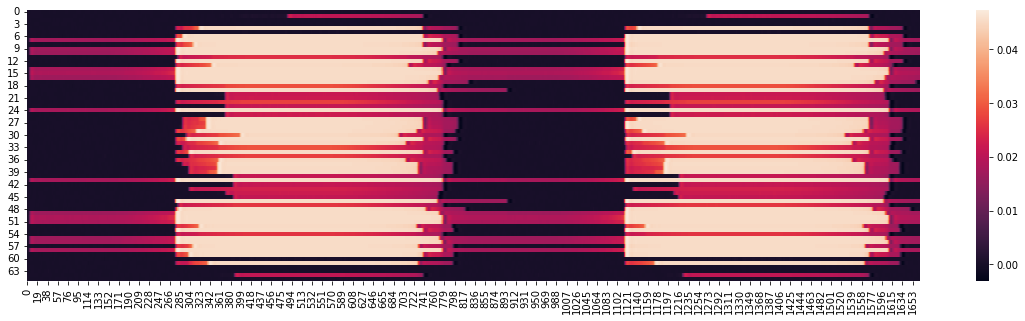

In [16]:
plt.figure(figsize=(20, 5))
sns.heatmap(bold.T)
plt.show()

# Add noise to the subjects

In [67]:
import numpy as np
import os
import csv

basepath = '../data/w3c'
outpath = '../data/w3c_wnoise2/'

path = os.path.join(basepath, 'SBJ99_bold.npy')
bold = np.load(path)

# task_path = os.path.join(basepath, 'task_info.csv')
# tasks = []
# with open(task_path) as f:
#     for row in csv.DictReader(f):
#         tasks.append(row)

noisebold1 = np.load(os.path.join(outpath, 'noisebold1.npy')).T
noisebold2 = np.load(os.path.join(outpath, 'noisebold2.npy')).T
noisebold3 = np.load(os.path.join(outpath, 'noisebold3.npy')).T

In [68]:
"Shapes:"
for b in [bold, noisebold1, noisebold2, noisebold3]:
    print(b.shape)

(1667, 66)
(1667, 66)
(1667, 66)
(1667, 66)


In [69]:
import math
import random

def shuffle_parcels(mat):
    parcels_indices = list(range(mat.shape[1]))
    random.shuffle(parcels_indices)
    return mat[:, parcels_indices]

def add_prefix_zeros(s, cnt):
    assert len(s) <= cnt
    if len(s) == cnt:
        return s
    return '0' * (cnt - len(s)) + s

In [70]:
# Save OG:
np.save(os.path.join(outpath, 'SBJ.npy'), bold)

percentages = [0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1.0, 1.25, 1.5, 2.0]

noise_all = np.concatenate([noisebold1, noisebold2, noisebold3], axis=1)
mean_std_signal = np.mean(np.std(bold, axis=0))
mean_std_noise = np.mean(np.std(noise_all, axis=0))
noise_all = noise_all * mean_std_signal / mean_std_noise

n_parcels = bold.shape[1]
for perc in percentages:
    n_newparcels = math.ceil(n_parcels * perc)
    name = 'SBJ-A' + add_prefix_zeros(str(n_newparcels), 3)
    noise_all = shuffle_parcels(noise_all)
    bold_wnoise = np.concatenate([bold, noise_all[:, 0:n_newparcels]], axis=1)
    bold_wnoise = shuffle_parcels(bold_wnoise)
    np.save(os.path.join(outpath, '{}.npy'.format(name)), bold_wnoise)


In [71]:

SNRs = [10.0, 5.0, 3.3, 2.5, 2.0, 1.3, 1.0, 0.8, 0.6, 0.5]
# simulated after percentages for the percentage to be the amount of
# noise std added to the BOLD signal

signal_mean = np.mean(bold)
std_noise = np.std(noise_all)

n_parcels = bold.shape[1]
for snr in SNRs:
    name = 'SBJ-SNR' + add_prefix_zeros(str(snr), 4)
    noise_sampled = shuffle_parcels(noise_all)
    noise_sampled = noise_sampled * signal_mean / snr / std_noise
#     print(name, np.mean(bold), np.std(noise_sampled), np.mean(bold) / np.std(noise_sampled))
    bold_wnoise = bold + noise_sampled[:, 0:n_parcels]
    bold_wnoise = shuffle_parcels(bold_wnoise)
    np.save(os.path.join(outpath, '{}.npy'.format(name)), bold_wnoise)


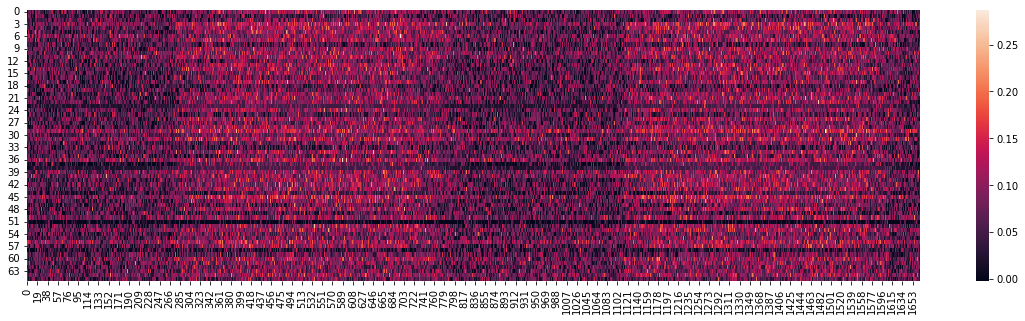

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

bold_wnoise = np.load(os.path.join(outpath, 'SBJ-SNR00.5.npy'))

plt.figure(figsize=(20, 5))
sns.heatmap(bold_wnoise.T)
plt.show()

In [31]:
# OLD WAY to generate the subjects with noise

import math
import random
np.save(os.path.join(outpath, 'SBJ100.npy'), bold)

n_parcels = bold.shape[1]
bold125us = np.concatenate([bold, noisebold1[:, 0:math.ceil(n_parcels / 4)]], axis=1)
bold150us = np.concatenate([bold, noisebold1[:, 0:math.ceil(n_parcels / 2)]], axis=1)
bold200us = np.concatenate([bold, noisebold1], axis=1)
bold300us = np.concatenate([bold, noisebold1, noisebold2], axis=1)
bold400us = np.concatenate([bold, noisebold1, noisebold2, noisebold3], axis=1)
names = ['SBJ125', 'SBJ150', 'SBJ200', 'SBJ300', 'SBJ400']

for b, name in zip([bold125us, bold150us, bold200us, bold300us, bold400us], names):
    np.save(os.path.join(outpath, '{}-unshuffled.npy'.format(name)), b)
    parcels_indices = list(range(b.shape[1]))
    random.shuffle(parcels_indices)
    bold_s = b[:, parcels_indices]
    np.save(os.path.join(outpath, '{}.npy'.format(name)), bold_s)


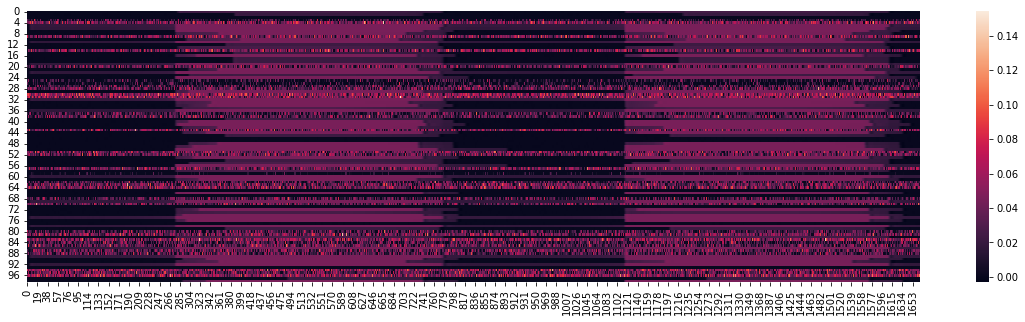

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

bold150 = np.load(os.path.join(outpath, 'SBJ150.npy'))

plt.figure(figsize=(20, 5))
sns.heatmap(bold150.T)
plt.show()

In [30]:
header = ['id0','id1','id2','path','TR']
with open(os.path.join(outpath, 'cohort.csv'), 'w') as out:
    writer = csv.writer(out)
    writer.writerow(header)
    for name in ['SBJ100'] + names:
        writer.writerow([name,'','','{}_bold.npy'.format(name),0.72])